In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

In [3]:
R_Nanya = np.array([5.8,5.85,5.88,5.9,5.91,5.92,5.92,5.9,5.9,5.97,6.06,6.1,6.14,6.19,6.25,6.36,6.47,6.57,6.65,6.65,6.66,6.79,6.93,6.97,6.97,6.97,6.98,7.08,7.16,7.15,7])
w_Nanya = np.linspace(400,700,31)

In [4]:
wl = np.linspace(380, 780, 401)
air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime = ml.open_material('sodalime', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')
glass = ml.Non_Dispersion(1.52)

bonsai_5 = pd.read_csv('./Nanya/bonsai_5.csv')
nanya = pd.read_csv('./Nanya/Nanya_sim.csv')
nyw = nanya['nm'].values
nyr = nanya['R_dia'].values

notap = pd.read_csv('./Nanya/R_5_4.csv')['SCAN']
blacktap = pd.read_csv('./Nanya/R_5_B4.csv')['SCAN']

dia = tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, 75, 31, 45, 8, None]
)

RRR = tm.sec_reflc(dia, wl, 5)

plt.plot(nyw, nyr/100, '.b')
plt.plot(w_Nanya, R_Nanya/100)
plt.plot(wl, notap/100, '-k')
plt.plot(wl, RRR, '--b')

plt.show()
plt.plot(wl, blacktap/100, '-k')
plt.plot(wl, dia.reflectance(wl, 5),'--b')
plt.show()
#print(wl)

FileNotFoundError: [Errno 2] File ./Nanya/bonsai_5.csv does not exist: './Nanya/bonsai_5.csv'

In [5]:
hypo = lambda th:tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
)

fom = lambda th: sum(
    abs(
        hypo(th).reflectance(wl, 10)-blacktap/100
    )
) + sum(
    abs(
        tm.sec_reflc(hypo(th), wl, 10)-notap/100
    )
)

fom1 = lambda th: np.mean(
    abs(
        hypo(th).reflectance(wl, 10)-blacktap/100
    )
)

fom2 = lambda th: np.mean(
    abs(
        tm.sec_reflc(hypo(th), wl, 5)-notap/100
    )
)

In [6]:
sol = differential_evolution(fom, [(70,80),(28,30),(40,50),(6,10)])
print(sol.x)

[70.         28.         40.05983341  6.        ]


In [7]:
sol2 = minimize(fom1, sol.x)
print(sol2.x)

[65.38871914 24.21135319 35.44040461  7.44628421]


In [14]:
sol3 = minimize(fom2, sol.x)
print(sol3.x)

[56.63484038 17.17604893 42.46766222  7.04538891]


[65.38871914 24.21135319 35.44040461  7.44628421]


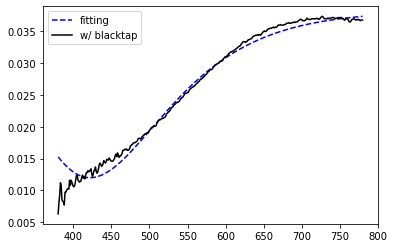

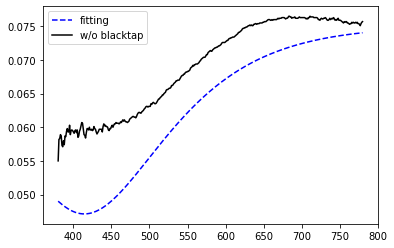

In [26]:
plt.plot(wl, hypo(sol2.x).reflectance(wl, 5), '--b',label = 'fitting')
plt.plot(wl, blacktap/100, '-k', label = 'w/ blacktap')
plt.legend(loc = 'best')
#plt.savefig('11.png')
print(sol2.x)
plt.show()
plt.plot(wl, tm.sec_reflc(hypo(sol2.x), wl, 5), '--b',label = 'fitting')
plt.plot(wl, notap/100, '-k',label = 'w/o blacktap')
plt.legend(loc = 'best')
#plt.savefig('22.png')
plt.show()

[ 1.82359531 -1.19116391] [ 1.74895727 -1.20246711]


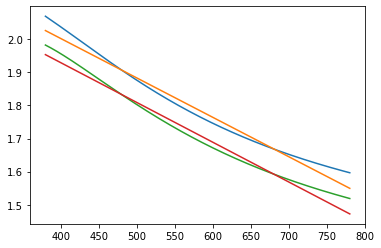

In [6]:
ITO1_t = lambda th: ml.Chromatic_Dispersion(th[0],th[1],550).nvalues(wl)
FOM1 = lambda th: sum(abs(ITO1_t(th) - ITO1.nvalues(wl)))

ITO2_t = lambda th: ml.Chromatic_Dispersion(th[0],th[1],550).nvalues(wl)
FOM2 = lambda th: sum(abs(ITO2_t(th) - ITO2.nvalues(wl)))

sol1 = minimize(FOM1, [0,0])
sol2 = minimize(FOM2, [0,0])

print(sol1.x, sol2.x)
plt.plot(wl, ITO1.nvalues(wl))
plt.plot(wl, ITO1_t(sol1.x))
plt.plot(wl, ITO2.nvalues(wl))
plt.plot(wl, ITO2_t(sol2.x))
plt.show()

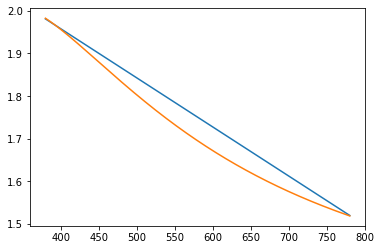

0.03378171636408957

In [31]:
ITO1_L = ml.Chromatic_Dispersion(1.8236,-1.1912,550)
ITO2_L = ml.Chromatic_Dispersion(1.7490,-1.2025,550)
ITO2_LT = ml.Chromatic_Dispersion(1.785,-1.1525,550)
#plt.plot(wl, ITO2_L.nvalues(wl))
plt.plot(wl, ITO2_LT.nvalues(wl))
plt.plot(wl, ITO2.nvalues(wl))
plt.show()
np.mean(ITO2_LT.nvalues(wl)-ITO2.nvalues(wl))